https://deap.readthedocs.io/en/master/tutorials/advanced/gp.html

In [1]:
import operator

from deap import base, creator, gp
from deap import tools

In [2]:
pset = gp.PrimitiveSet("main", 2)
pset.addPrimitive(max, 2)
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.mul, 2)
pset.addTerminal(3)
pset.addPrimitive(operator.neg, 1)

pset.renameArguments(ARG0="x")
pset.renameArguments(ARG1="y")

expr = gp.genFull(pset, min_=1, max_=3)
tree = gp.PrimitiveTree(expr)
print(tree)

mul(add(y, y), max(y, x))


In [3]:
for i in range(5):
    expr = gp.genFull(pset, min_=3, max_=3)
    print(gp.PrimitiveTree(expr))

max(mul(neg(y), add(x, x)), max(max(y, y), neg(3)))
add(neg(neg(3)), neg(add(3, x)))
mul(add(mul(3, y), max(3, y)), max(max(x, x), neg(y)))
mul(mul(max(y, 3), add(x, x)), mul(mul(x, 3), mul(3, 3)))
add(add(max(3, y), neg(x)), mul(mul(x, x), max(y, 3)))


In [4]:
def if_then_else(input, output1, output2):
    return output1 if input else output2

pset2 = gp.PrimitiveSetTyped("main", [bool, float], float)
pset2.addPrimitive(operator.xor, [bool, bool], bool)
pset2.addPrimitive(operator.mul, [float, float], float)
pset2.addPrimitive(if_then_else, [bool, float, float], float)
pset2.addTerminal(3.0, float)
pset2.addTerminal(1, bool)

pset2.renameArguments(ARG0="x")
pset2.renameArguments(ARG1="y")

for i in range(5):
    expr = gp.genFull(pset2, min_=1, max_=3)
    print(gp.PrimitiveTree(expr))

mul(mul(if_then_else(1, 3.0, y), if_then_else(x, 3.0, y)), if_then_else(xor(1, 1), if_then_else(x, y, y), if_then_else(1, 3.0, 3.0)))
mul(3.0, 3.0)
mul(mul(3.0, y), mul(y, y))
mul(if_then_else(xor(1, 1), mul(3.0, y), mul(y, y)), if_then_else(xor(1, 1), mul(3.0, 3.0), if_then_else(1, y, y)))
if_then_else(1, 3.0, 3.0)


In [5]:
import random
pset3 = None

pset3 = gp.PrimitiveSet("main", 2)
pset3.addPrimitive(max, 2)
pset3.addPrimitive(operator.add, 2)
pset3.addPrimitive(operator.mul, 2)
pset.addTerminal(3)
pset3.addPrimitive(operator.neg, 1)

pset3.renameArguments(ARG0="x")
pset3.renameArguments(ARG1="y")


pset3.addEphemeralConstant("constant3", lambda: random.uniform(-1, 1))

expr = gp.genFull(pset3, min_=1, max_=3)
tree = gp.PrimitiveTree(expr)
print(tree)

max(neg(max(-0.025980285106392165, x)), max(add(0.5077303078413582, y), neg(0.10268165634995885)))


In [6]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin,
               pset=pset)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genFull, pset=pset, min_=1, max_=3)
toolbox.register("individual", tools.initIterate, creator.Individual,
                 toolbox.expr)


In [7]:
a = toolbox.individual()
print(a)

max(neg(x), add(3, 3))


In [8]:
expr = gp.genFull(pset, min_=1, max_=3)
tree = gp.PrimitiveTree(expr)
print(str(tree))
print(tree)
function = gp.compile(tree, pset)
print(function(1, 2))
print(type(function))

neg(mul(x, 3))
neg(mul(x, 3))
-3
<class 'function'>


In [9]:
from deap import base, creator, gp

pset = gp.PrimitiveSet("MAIN", 1)
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.renameArguments(ARG0='x')

creator.create("Individual", gp.PrimitiveTree)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)

expr = toolbox.individual()
nodes, edges, labels = gp.graph(expr)

### Graphviz Section ###
import pygraphviz as pgv

g = pgv.AGraph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)
g.layout(prog="dot")

for i in nodes:
    n = g.get_node(i)
    n.attr["label"] = labels[i]

g.draw("tree.pdf")


/home/yuki/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


/home/yuki/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


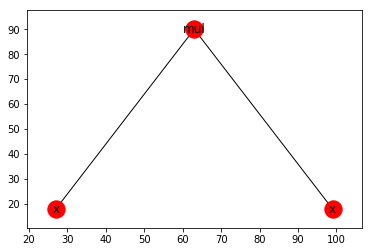

In [10]:
from deap import base, creator, gp

pset = gp.PrimitiveSet("MAIN", 1)
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.renameArguments(ARG0='x')

creator.create("Individual", gp.PrimitiveTree)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)

expr = toolbox.individual()
nodes, edges, labels = gp.graph(expr)



import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)
pos = graphviz_layout(g, prog="dot")


nx.draw_networkx_nodes(g, pos)
nx.draw_networkx_edges(g, pos)
nx.draw_networkx_labels(g, pos, labels)
plt.show()